# Guided Project: Credit Card Customer Segmentation

## Table of Contents 
1. [Introduction](#introduction)
2. [Understanding the Data](#understanding-data)
3. [ ](# )
4. [ ](# )
5. [ ](# )
6. [ ](# )
7. [ ](# )
8. [ ](# )


## Introduction <a name="introduction"></a>

This is a project I completed based on a guide called "Credit Card Customer Segmentation" on the Dataquest learning platform. 

In this project I have learned new skills related to unsupervised machine learning using scikit learn 

The implementation is written in Python, and is shown in Jupyter Notebooks.

![.jpg](img/cccsegment/4870599_49778_small.jpg)

Source: [Image by studiogstock on Freepik](https://www.freepik.com/free-vector/business-growth-money-savings_4870599.htm#fromView=search&page=1&position=55&uuid=e584fd9a-e0ae-4f63-b6c3-49591275a1a8)

### Goal of this project

Our objective is to leverage data science techniques to segment clients of a credit card company based on their behavior and demographics. By using the K-means algorithm on a  dataset, we aim to identify distinct customer groups. These segments will assist in providing tailored business strategies, such as adjusting credit limits and offering targeted incentives. This project aims to optimize business operations and enhance customer satisfaction.

### Required steps
In order to achieve the goals, we'll go through the following steps:

1. Analyze the dataset
2. Prepare the data for modeling
3. Find an appropriate number of clusters
4. Segment the data
5. Interpret and explain the results

## 1. Analyze the dataset <a name="analyze-data"></a>

Instructions

    Import pandas, numpy, matplotlib, seaborn, and the KMeans() and StandardScaler() classes from scikit-learn.
    Read the 'customer_segmentation.csv' into a pandas DataFrame.
    Familiarize ourselves with the dataset. Answer questions such as:
        How big is the dataset? How many columns does it have? Do we see any particular column that doesn't use the analysis?
        What's the type of data contained in each column? Are there many categorical variables? How are we dealing with them?
        Are there any missing values?
        Look at the correlation between the columns and explain what we see.
        Plot the distribution of each numeric column and comment on the results.


### Import the dependencies
First we need to import the required libraries.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Load and explore the data
The customers' credit card data are stored in 1 file called customer_segmentation.csv

In [2]:
# load files into dataframes
customers = pd.read_csv("data/cccsegment/customer_segmentation.csv")

In [4]:
# explore the dataset columns, size, data types
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

In [3]:
# explore the customers data examples
customers.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


### Observations
Some initial observations about the customers data set
1. Here's the data dictionary:

- `customer_id`: unique identifier for each customer.
- `age`: customer age in years.
- `gender`: customer gender (M or F).
- `dependent_count`: number of dependents of each customer.
- `education_level`: level of education ("High School", "Graduate", etc.).
- `marital_status`: marital status ("Single", "Married", etc.).
- `estimated_income`: the estimated income for the customer projected by the data science team.
- `months_on_book`: time as a customer in months.
- `total_relationship_count`: number of times the customer contacted the company.
- `months_inactive_12_mon`: number of months the customer did not use the credit card in the last 12 months.
- `credit_limit`: customer's credit limit.
- `total_trans_amount`: the overall amount of money spent on the card by the customer.
- `total_trans_count`: the overall number of times the customer used the card.
- `avg_utilization_ratio`: daily average utilization ratio.
2. There appear to be no empty values in the entire data set
3. The `gender`, `education_level` and `marital_status` columns are categorical, so we'll have to encode them later for our analysis.
4. Its already clear that we won't need `customer_id` for analysis. All the other columns could be required for analyis.

#### Visual observations
For a visual aspects of what we observe in the data, we'll use:
1. A correlation between the columns
2. A distribution of each numeric column

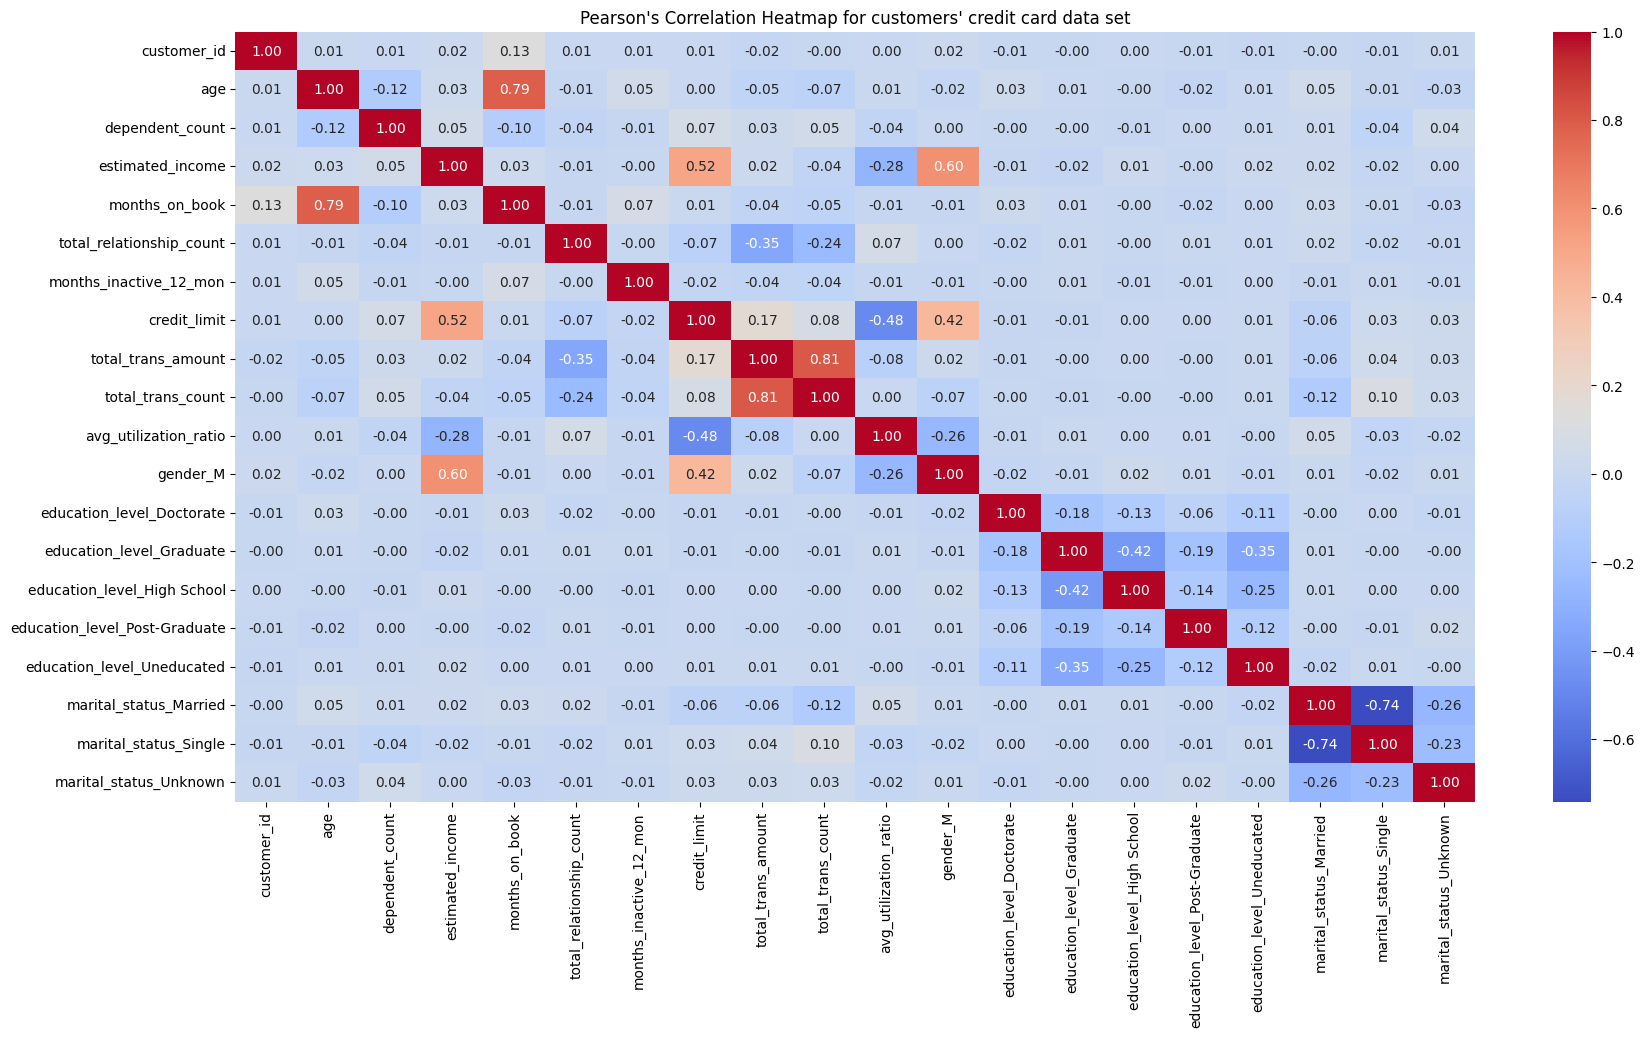

In [8]:
# Create a copy of the dataframe, and encode the categorical columns
customers_dummies = customers.copy()
# Create dummy variables and preview the first 5 rows
customers_dummies = pd.get_dummies(customers_dummies, drop_first=True)
customers_dummies.head()

# Calculate Pearson's correlation coefficient
correlation_matrix = customers_dummies.corr()

# Generate a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson's Correlation Heatmap for customers' credit card data set")
plt.show()

Correlations between columns:
- ...

In [ ]:
# Plot distributions of each column's values

## Final Conclusion  <a name="final-concl"></a>

...